In [36]:
%config InlineBacend.figure_format = 'retina'
from cassandra.cluster import Cluster
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import re
from datetime import datetime
import seaborn as sns
import squarify
from PIL import Image
from wordcloud import WordCloud , STOPWORDS, ImageColorGenerator
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [37]:
cluster = Cluster()

session = cluster.connect("demo_twitter")

rows = session.execute("select * from demo_twitter_7")

cols = ['uuid', 'screen_name', 'created_at', 'followers', 'location', 'favorite', 'retweet', 'source', 'text', 'statuses']
# get dataframe on pandas
def process_results(rows):

    twitter_list = []
    count = 0
    for row in rows:
        twitter_list.append([row.uuid, row.screen_name, row.created_at, row.followers, row.location, row.favorite, row.retweet, row.source, row.description, row.statuses])
    data_set = pd.DataFrame(twitter_list, columns=cols)
    return data_set

#Preprocessing data
df = process_results(rows)

In [38]:
df.head(10)

,uuid,screen_name,created_at,followers,location,favorite,retweet,source,text,statuses
0,257bd60a-733f-11ed-8e58-cdd0cb8dba8d,BNB_Tracker,2022-12-03 14:33:29,342,,2,0,Twitter Web App,#BinanceCoin price update: $BNB\n\n#BNB $291....,91973
1,0948f928-733d-11ed-8e58-cdd0cb8dba8d,lopp,2022-12-03 15:02:17,423104,Cyberspace,57,14,Hypefury,Software tend to either get better or get wor...,38675
2,ca0f5a41-7338-11ed-8e58-cdd0cb8dba8d,bitcoinrate247,2022-12-03 16:00:02,433,International,0,0,BtcApp,"Average Bitcoin market price is: USD 16,965.2...",58224
3,b7b3fd6b-738e-11ed-8e58-cdd0cb8dba8d,mariama_kromah,2022-12-04 03:35:59,0,,0,0,Twitter Web App,Pro Bitcoin Trader: Massive Christmas Move Co...,8
4,10337d46-7393-11ed-8e58-cdd0cb8dba8d,CryptoDubai912,2022-12-04 04:32:46,591,UAE,1,0,WordPress.com,#Ethereum Could Fall Under Selling Pressure A...,41597
5,136407db-733f-11ed-8e58-cdd0cb8dba8d,Respect7752,2022-12-03 14:43:10,144,,0,27,Twitter for Android,RT @mustafaavsr54: You still have a chance to...,2566
6,e16fe6ba-7392-11ed-8e58-cdd0cb8dba8d,Levi_Petrina30,2022-12-04 02:15:07,75,,0,0,Twitter for Android,@0xsushi @MajesticBullNFT @mohus_sam @berry_b...,662
7,f79e125a-7390-11ed-8e58-cdd0cb8dba8d,LivePriceCrypto,2022-12-04 02:19:50,4083,,0,0,vaiotapi,#Bitcoin Last Price $16964 #BTC 🚀\nWeekly Ind...,359615
8,1d371b16-7397-11ed-8e58-cdd0cb8dba8d,zelmaniedrist6,2022-12-04 05:29:33,0,,0,480,Twitter Web App,RT @wos_club: I minted the first 3D HQ Sharks...,169
9,7cbf9018-738f-11ed-8e58-cdd0cb8dba8d,_bloombot,2022-12-04 04:32:29,1165,,0,0,NFT Sales Bot by @Sweep_init,754.eth 🔌\nreceived an offer💰 \nfor 12.5183Ξ...,112485


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40579 entries, 0 to 40578
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uuid         40579 non-null  object
 1   screen_name  40579 non-null  object
 2   created_at   40579 non-null  object
 3   followers    40579 non-null  object
 4   location     40579 non-null  object
 5   favorite     40579 non-null  object
 6   retweet      40579 non-null  object
 7   source       40579 non-null  object
 8   text         40579 non-null  object
 9   statuses     40579 non-null  object
dtypes: object(10)
memory usage: 3.1+ MB


In [40]:
df1 = df.copy()

# Loại bỏ null

In [41]:
df1 = df1.replace(r'', np.NaN)

In [42]:
total = df1.isnull().sum().sort_values(ascending=False) #Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
percent_1=df1.isnull().sum()/df1.isnull().count()*100 #Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) #Làm tròn 1 chữ số và sort giảm dần
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data


,Total,%
location,20462,50.4
uuid,0,0.0
screen_name,0,0.0
created_at,0,0.0
followers,0,0.0
favorite,0,0.0
retweet,0,0.0
source,0,0.0
text,0,0.0
statuses,0,0.0


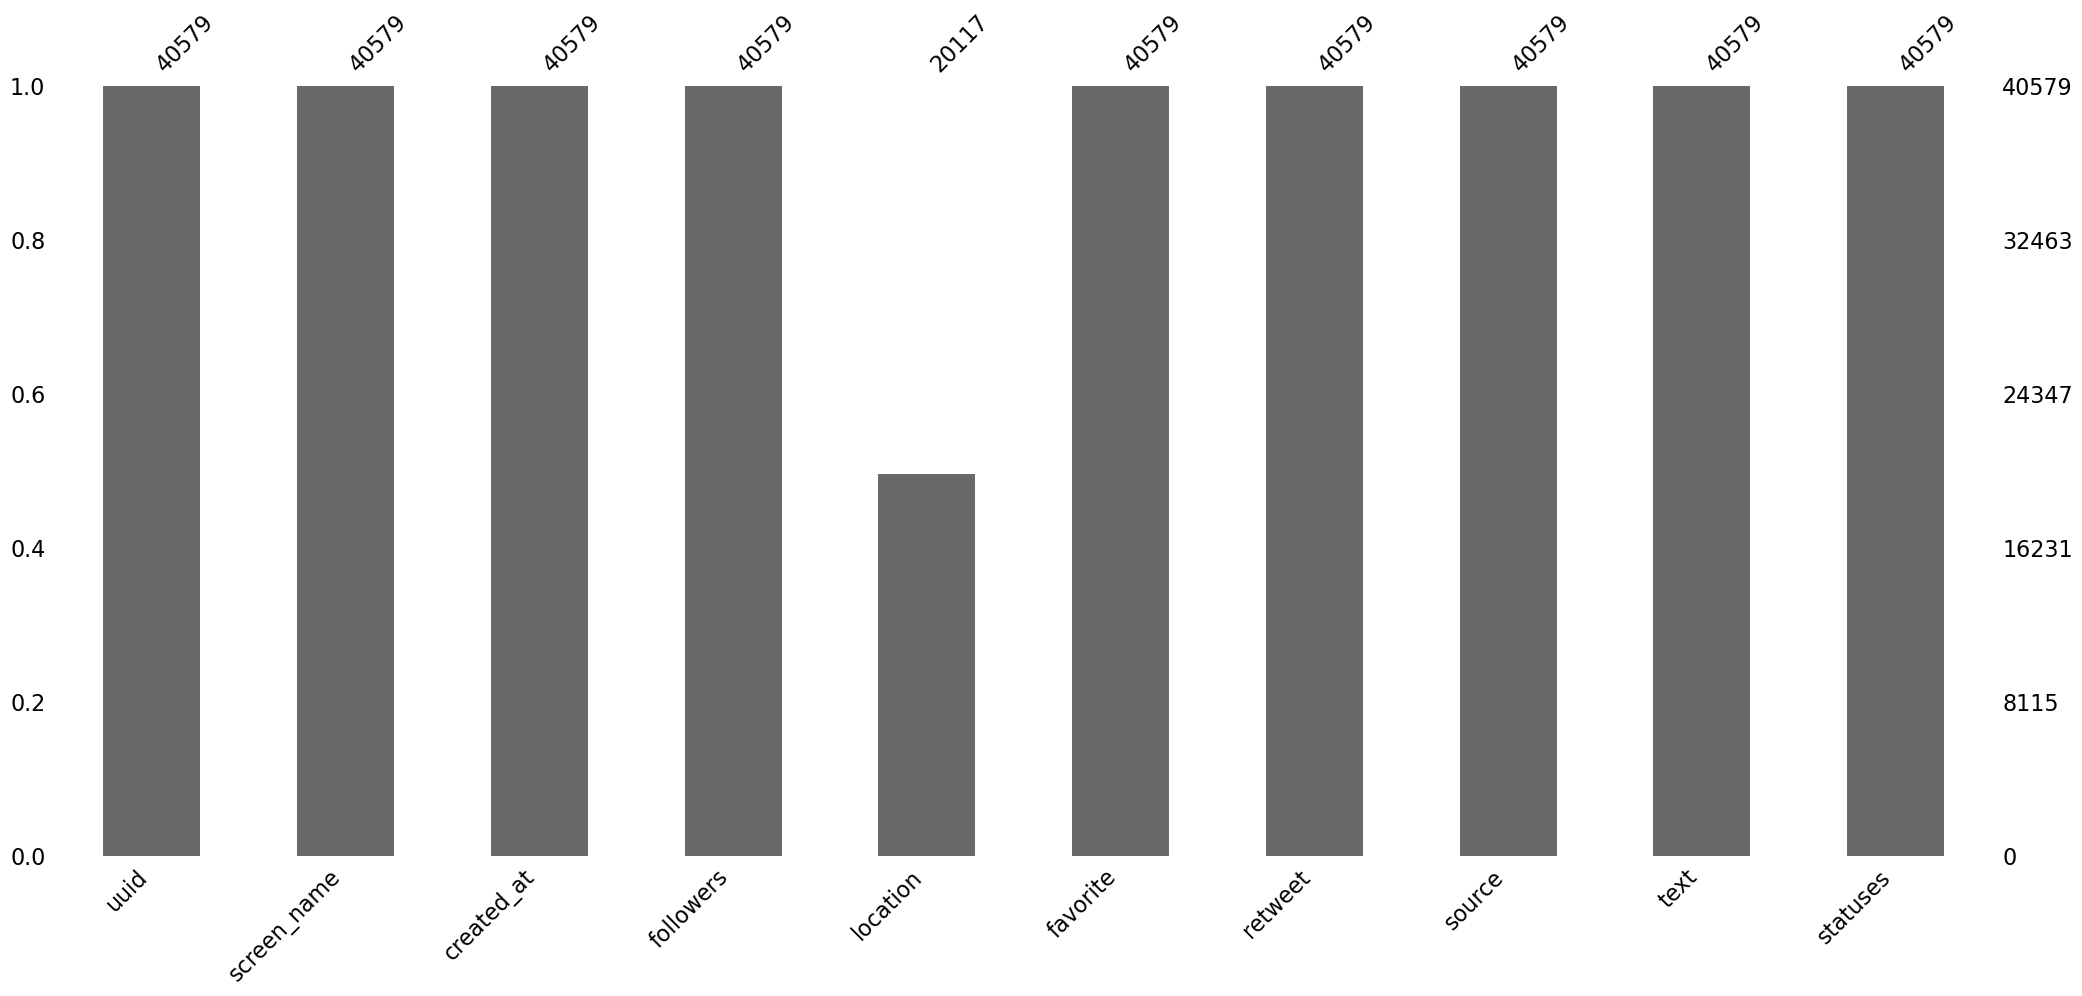

In [43]:
plt.figure(figsize=(10,6))
msno.bar(df1)
plt.show()

In [44]:
df1

,uuid,screen_name,created_at,followers,location,favorite,retweet,source,text,statuses
0,257bd60a-733f-11ed-8e58-cdd0cb8dba8d,BNB_Tracker,2022-12-03 14:33:29,342,NaN,2,0,Twitter Web App,#BinanceCoin price update: $BNB\n\n#BNB $291....,91973
1,0948f928-733d-11ed-8e58-cdd0cb8dba8d,lopp,2022-12-03 15:02:17,423104,Cyberspace,57,14,Hypefury,Software tend to either get better or get wor...,38675
2,ca0f5a41-7338-11ed-8e58-cdd0cb8dba8d,bitcoinrate247,2022-12-03 16:00:02,433,International,0,0,BtcApp,"Average Bitcoin market price is: USD 16,965.2...",58224
3,b7b3fd6b-738e-11ed-8e58-cdd0cb8dba8d,mariama_kromah,2022-12-04 03:35:59,0,NaN,0,0,Twitter Web App,Pro Bitcoin Trader: Massive Christmas Move Co...,8
4,10337d46-7393-11ed-8e58-cdd0cb8dba8d,CryptoDubai912,2022-12-04 04:32:46,591,UAE,1,0,WordPress.com,#Ethereum Could Fall Under Selling Pressure A...,41597
...,...,...,...,...,...,...,...,...,...,...
40574,9a3866a3-7332-11ed-8e58-cdd0cb8dba8d,PloomTarmo1,2022-12-03 16:51:07,23,NaN,0,7,Twitter for Android,RT @smartcredit_io: But:\n(1) miners have sol...,152
40575,8131ff90-7332-11ed-8e58-cdd0cb8dba8d,ARMScan,2022-12-03 17:02:06,382,NaN,0,19,Twitter for iPhone,RT @soundscape_vr: The @soundscape_vr Musical...,103772
40576,21d5636a-733f-11ed-8e58-cdd0cb8dba8d,BURNERA56462776,2022-12-03 14:35:15,17,NaN,0,0,"Cheap Bots, Done Quick!",DID YOU KNOW!? Secure Bitcoin on Twitter!? NOW!!,94651
40577,71cfa7e4-7347-11ed-8e58-cdd0cb8dba8d,brando266,2022-12-03 12:52:16,83,Helsinki,1,0,Twitter Web App,My thoughts about the Cash Rain 👇\n\nhttps://...,413


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40579 entries, 0 to 40578
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uuid         40579 non-null  object
 1   screen_name  40579 non-null  object
 2   created_at   40579 non-null  object
 3   followers    40579 non-null  object
 4   location     20117 non-null  object
 5   favorite     40579 non-null  object
 6   retweet      40579 non-null  object
 7   source       40579 non-null  object
 8   text         40579 non-null  object
 9   statuses     40579 non-null  object
dtypes: object(10)
memory usage: 3.1+ MB


# Xử lý null

In [46]:
df1.dropna(subset=['uuid', 'screen_name', 'created_at', 'followers', 'favorite', 'retweet', 'source', 'text', 'statuses'], inplace=True)

In [47]:
df1['location'].fillna("Others", inplace=True)

In [48]:
total = df1.isnull().sum().sort_values(ascending=False) #Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
percent_1=df1.isnull().sum()/df1.isnull().count()*100 #Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) #Làm tròn 1 chữ số và sort giảm dần
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data

,Total,%
uuid,0,0.0
screen_name,0,0.0
created_at,0,0.0
followers,0,0.0
location,0,0.0
favorite,0,0.0
retweet,0,0.0
source,0,0.0
text,0,0.0
statuses,0,0.0


# Chuyển đổi kiểu dữ liệu

In [49]:
df1['followers'] = df1['followers'].astype(int)
df1['favorite'] = df1['favorite'].astype(int)
df1['retweet'] = df1['retweet'].astype(int)
df1['statuses'] = df1['statuses'].astype(int)
df1['created_at'] = df1['created_at'].apply(lambda x: (datetime.strptime(x, '%Y-%m-%d %H:%M:%S')))
df1['created_at'] = pd.to_datetime(df1['created_at'])
df1['tweet_hour'] = df1['created_at'].apply(lambda x: x.strftime('%H'))
df1['tweet_hour'] = df1['tweet_hour'].astype(int)
df1['created_at'] = df1['created_at'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [50]:
df1.describe()

,followers,favorite,retweet,statuses,tweet_hour
count,4.057900e+04,40579.000000,40579.000000,4.057900e+04,40579.000000
mean,1.076083e+04,1.361763,947.222258,4.488092e+04,9.087927
std,1.530184e+05,39.285422,5504.875986,1.473554e+05,6.020428
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,5.700000e+01,0.000000,0.000000,6.720000e+02,3.000000
50%,2.510000e+02,0.000000,8.000000,4.111000e+03,13.000000
75%,9.515000e+02,0.000000,195.000000,2.870900e+04,14.000000
max,9.967999e+06,6992.000000,81630.000000,3.004310e+06,21.000000


In [51]:
df1.describe(include = "object")

,uuid,screen_name,created_at,location,source,text
count,40579,40579,40579,40579,40579,40579
unique,40579,20116,10,5431,621,19759
top,257bd60a-733f-11ed-8e58-cdd0cb8dba8d,WSjp_insight,2022-12-03,Others,Twitter Web App,RT @GuardianNigeria: These are the headlines ...
freq,1,1316,19508,20462,12714,1222


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40579 entries, 0 to 40578
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uuid         40579 non-null  object
 1   screen_name  40579 non-null  object
 2   created_at   40579 non-null  object
 3   followers    40579 non-null  int64 
 4   location     40579 non-null  object
 5   favorite     40579 non-null  int64 
 6   retweet      40579 non-null  int64 
 7   source       40579 non-null  object
 8   text         40579 non-null  object
 9   statuses     40579 non-null  int64 
 10  tweet_hour   40579 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 3.7+ MB


# Loại bỏ các ký tự đặc biệt trong location

In [53]:
df1[df1.location.str.contains(r'[^0-9a-zA-Z]', na=False)]

,uuid,screen_name,created_at,followers,location,favorite,retweet,source,text,statuses,tweet_hour
19,5d385791-7343-11ed-8e58-cdd0cb8dba8d,susanoftheworld,2022-12-03,68,"California, USA",0,5,Twitter for Android,RT @bemzmedia: US Senator: Bitcoin Is A Commo...,179,13
21,71cf80de-7347-11ed-8e58-cdd0cb8dba8d,chuksteak,2022-12-03,175,Mitten State,4,1,Twitter for Android,@OTC_Bitcoin Can we get a mulligan please? #B...,3293,12
22,5caaf9db-7345-11ed-8e58-cdd0cb8dba8d,desiTraveler,2022-12-03,7840,Third Rock,1,0,Twitter Web App,@Socialslack which currency ? INR ? Bitcoin ...,35262,13
25,c3036a45-738c-11ed-8e58-cdd0cb8dba8d,ampvass,2022-12-04,273,★//☆ — neocity . . 🥪,0,456,Twitter for Android,RT @bitindichain: Bitindi Chain $BNI Bridge L...,2784,3
28,f357f253-7392-11ed-8e58-cdd0cb8dba8d,akkaufman,2022-12-04,3225,"Sequim, WA",1,0,Twitter for iPhone,@parkeralewis Now tell the AI to invent a fut...,207685,1
...,...,...,...,...,...,...,...,...,...,...,...
40564,d7fa5ccb-733a-11ed-8e58-cdd0cb8dba8d,paora420nz,2022-12-03,2055,Aotearoa,0,560,Twitter for Android,RT @BitcoinMagazine: Fiat in Venezuela is so ...,20070,15
40566,2432ac4e-7397-11ed-8e58-cdd0cb8dba8d,Fityeth,2022-12-04,37593,Otherside,0,6,Twitter for iPhone,RT @AussiZen: Need more SCORPION #AApes in yo...,8675,5
40571,13634484-733f-11ed-8e58-cdd0cb8dba8d,RustEngineer,2022-12-03,9250,"Pacific Northwest, USA",0,3,Twitter for Android,"RT @RustEngineer: ""We are in a global, macro ...",55131,14
40573,e1fa8563-7390-11ed-8e58-cdd0cb8dba8d,italianace999,2022-12-04,408,"New York, USA",0,10,Twitter for iPhone,RT @gokhshteinmedia: Global Crypto Market Cap...,14098,3


In [54]:
df1 = df1.drop(df1[df1.location.str.contains(r'[^0-9a-zA-Z]', na=False)].index)

In [55]:
df1["location"] = df1["location"].apply(lambda x: re.sub("[0-9]", "Others", x)).str.title()

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28002 entries, 0 to 40577
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uuid         28002 non-null  object
 1   screen_name  28002 non-null  object
 2   created_at   28002 non-null  object
 3   followers    28002 non-null  int64 
 4   location     28002 non-null  object
 5   favorite     28002 non-null  int64 
 6   retweet      28002 non-null  int64 
 7   source       28002 non-null  object
 8   text         28002 non-null  object
 9   statuses     28002 non-null  int64 
 10  tweet_hour   28002 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 2.6+ MB


In [57]:
def clean_text(text):
  text = re.sub('#[A-Za-z0-9]+', 'Bitcoin', text) #removes '#' from srings
  text = re.sub('\\n', '', text) #removes '\n' from bitcoin
  text = re.sub('RT[\s]+','',text) 
  text = re.sub('https?:\/\/\s+', '', text) #removes hyperlinks
  return text

In [58]:
df1["clean_text"] = df1["text"].apply(clean_text)

In [59]:
df1.head(5)

,uuid,screen_name,created_at,followers,location,favorite,retweet,source,text,statuses,tweet_hour,clean_text
0,257bd60a-733f-11ed-8e58-cdd0cb8dba8d,BNB_Tracker,2022-12-03,342,Others,2,0,Twitter Web App,#BinanceCoin price update: $BNB\n\n#BNB $291....,91973,14,Bitcoin price update: $BNBBitcoin $291.12 USD...
1,0948f928-733d-11ed-8e58-cdd0cb8dba8d,lopp,2022-12-03,423104,Cyberspace,57,14,Hypefury,Software tend to either get better or get wor...,38675,15,Software tend to either get better or get wor...
2,ca0f5a41-7338-11ed-8e58-cdd0cb8dba8d,bitcoinrate247,2022-12-03,433,International,0,0,BtcApp,"Average Bitcoin market price is: USD 16,965.2...",58224,16,"Average Bitcoin market price is: USD 16,965.2..."
3,b7b3fd6b-738e-11ed-8e58-cdd0cb8dba8d,mariama_kromah,2022-12-04,0,Others,0,0,Twitter Web App,Pro Bitcoin Trader: Massive Christmas Move Co...,8,3,Pro Bitcoin Trader: Massive Christmas Move Co...
4,10337d46-7393-11ed-8e58-cdd0cb8dba8d,CryptoDubai912,2022-12-04,591,Uae,1,0,WordPress.com,#Ethereum Could Fall Under Selling Pressure A...,41597,4,Bitcoin Could Fall Under Selling Pressure At ...


# Trực quan hóa dữ liệu

## Biểu đồ phân bố top 10 Source được sử dụng nhiều nhất trong Twitter

In [60]:
source_counts = df1["source"].value_counts().sort_values()[-10:]
source_counts

 chainsnake                   119
 Twitter for iPad             160
 boto_io                      178
 IFTTT                        183
 Microsoft Power Platform     233
 WordPress.com                234
 vaiotapi                     364
 Twitter for iPhone          4861
 Twitter for Android         8334
 Twitter Web App             9859
Name: source, dtype: int64

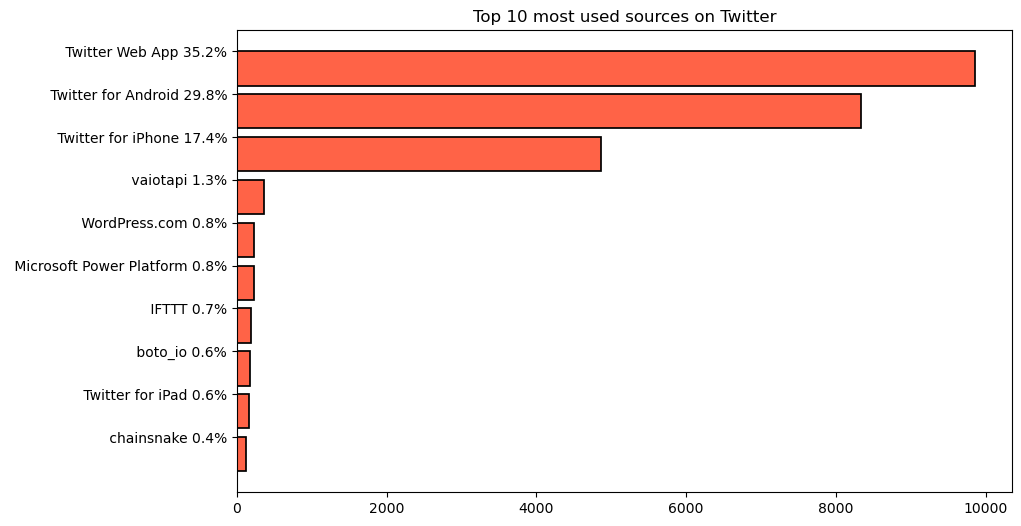

In [61]:
plt.figure(figsize=(10,6))
bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color='tomato', edgecolor = 'black',linewidth = 1.25)
y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(df1)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
plt.title("Top 10 most used sources on Twitter")
plt.show()

## Biểu đồ phân bố các giá trị của Favorite, Status, Followers và Retweet trong Twitter

In [62]:
favorite_counts = df1["favorite"].value_counts().sort_values()[-10:]
retweet_counts = df1["retweet"].value_counts().sort_values()[-10:]
status_counts = df1["statuses"].value_counts().sort_values()[-10:]
follower_counts = df1["followers"].value_counts().sort_values()[-10:]

/tmp/ipykernel_15100/476651733.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(favorite_counts, color='blue', kde = False, bins=20)
/tmp/ipykernel_15100/476651733.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(retweet_counts, color='red', kde = False, bins=20)
/tmp/ipykernel_15100/4766

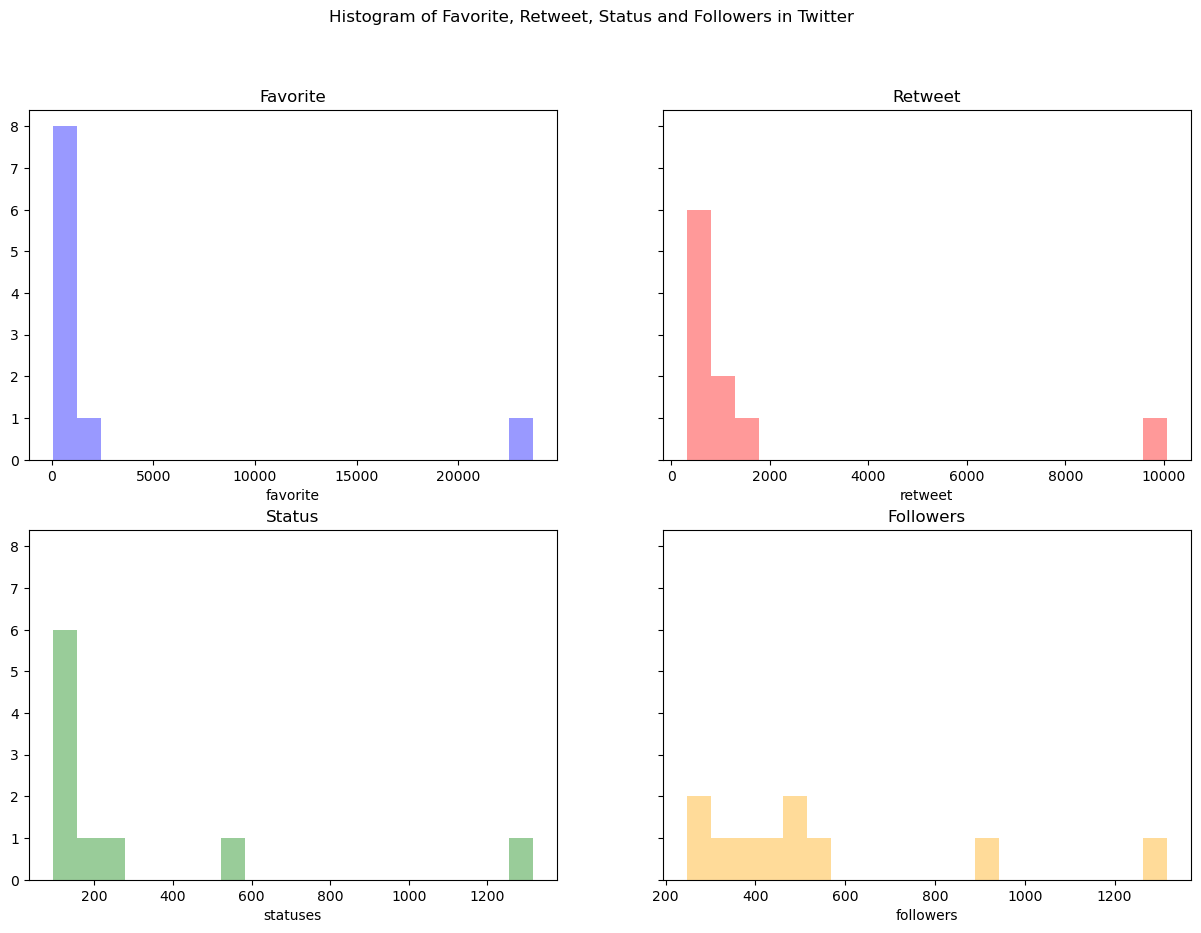

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Histogram of Favorite, Retweet, Status and Followers in Twitter')

plt.subplot(2,2,1)
plt.title('Favorite')
sns.distplot(favorite_counts, color='blue', kde = False, bins=20)

plt.subplot(2,2,2)
plt.title('Retweet')
sns.distplot(retweet_counts, color='red', kde = False, bins=20)

plt.subplot(2,2,3)
plt.title('Status')
sns.distplot(status_counts, color='green', kde = False, bins=20)

plt.subplot(2,2,4)
plt.title('Followers')
sns.distplot(follower_counts, color='orange', kde = False, bins=20)

plt.show()

## Biểu đồ thể hiện mật độ xác suất thống kê theo giờ dựa vào ngày tạo (created_at)

/tmp/ipykernel_15100/3434985481.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['tweet_hour'], kde=True, color='blue')


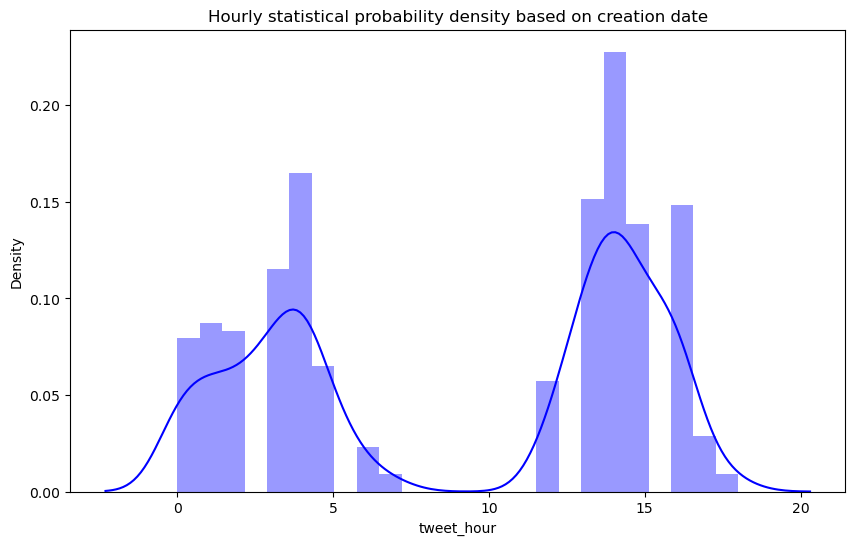

In [64]:
plt.figure(figsize=(10,6))
sns.distplot(df1['tweet_hour'], kde=True, color='blue')
plt.title("Hourly statistical probability density based on creation date")
plt.show()

## Biểu đồ kết hợp

### Biểu đồ thể hiện sự phân bố của Favorite, Retweet và Followers dựa vào ngày tạo (created_at)

In [65]:
time_series = df1[["followers", "favorite", "retweet", "created_at"]]
time_series

,followers,favorite,retweet,created_at
0,342,2,0,2022-12-03
1,423104,57,14,2022-12-03
2,433,0,0,2022-12-03
3,0,0,0,2022-12-04
4,591,1,0,2022-12-04
...,...,...,...,...
40572,300,0,0,2022-12-04
40574,23,0,7,2022-12-03
40575,382,0,19,2022-12-03
40576,17,0,0,2022-12-03


In [66]:
time_series_group = time_series.groupby( [ "created_at"] ).mean()
time_series_group

,followers,favorite,retweet
created_at,,,
2022-11-25,453.000000,0.000000,319.750000
2022-11-26,4421.000000,0.000000,319.750000
2022-11-27,453.000000,0.000000,238.000000
2022-11-28,2595.000000,0.000000,238.000000
2022-11-29,453.000000,0.000000,319.750000
2022-11-30,191021.025801,2.351837,43.965598
2022-12-02,453.000000,0.000000,334.000000
2022-12-03,3050.035489,1.137461,313.595766
2022-12-04,2334.313025,0.630672,2202.707815


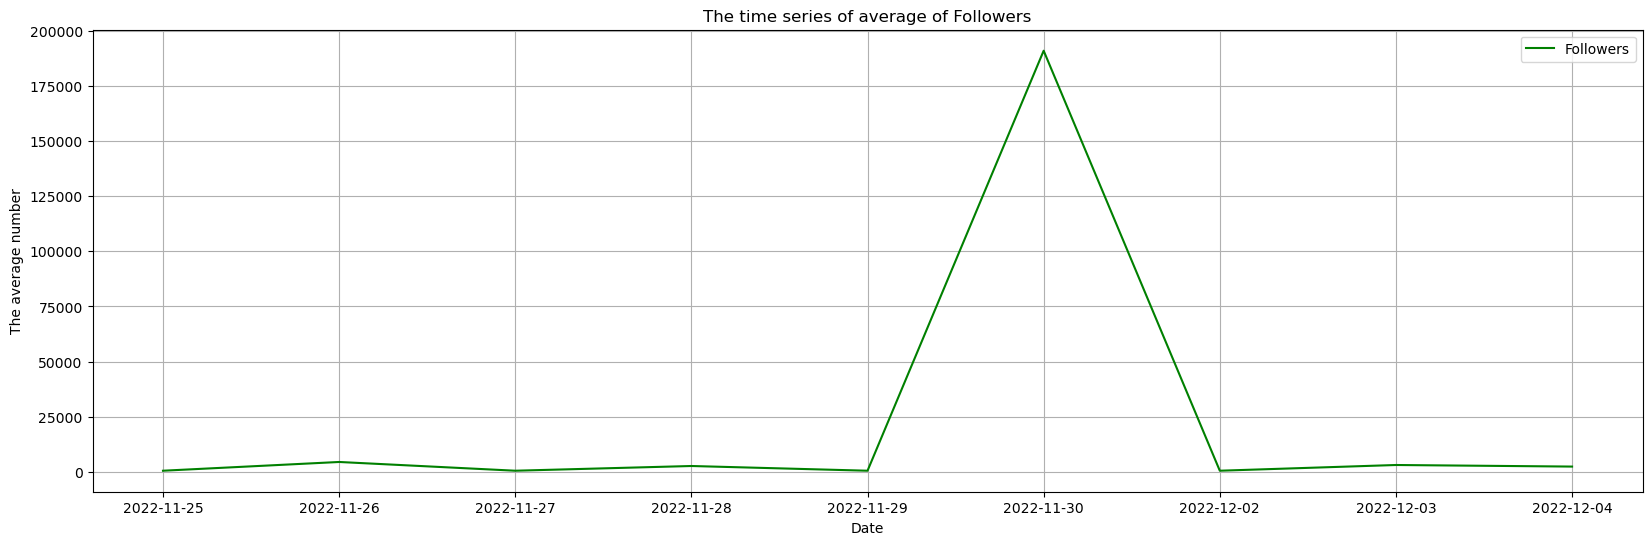

In [67]:
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.title('The time series of average of Followers')
plt.xlabel('Date')
plt.ylabel('The average number')
plt.plot(time_series_group.followers, 'green', label='Followers')
plt.legend()

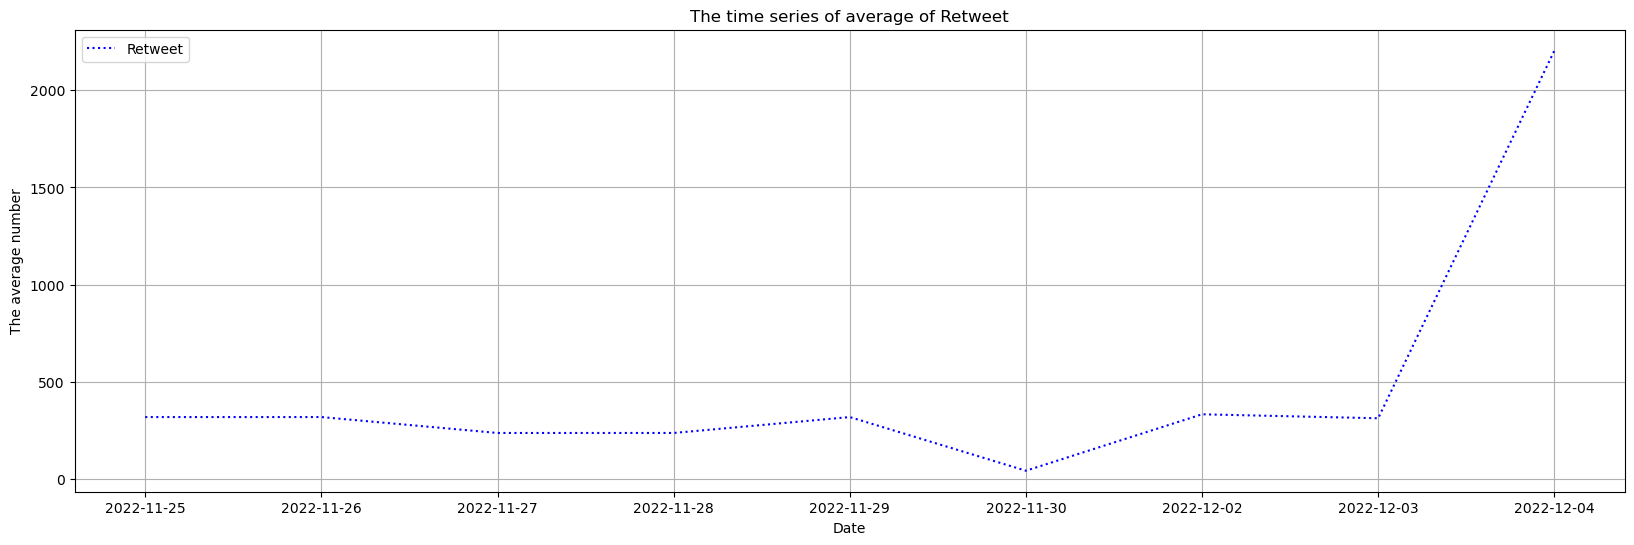

In [68]:
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.title('The time series of average of Retweet')
plt.xlabel('Date')
plt.ylabel('The average number')
plt.plot(time_series_group.retweet, 'blue', label='Retweet', linestyle='dotted')
plt.legend()

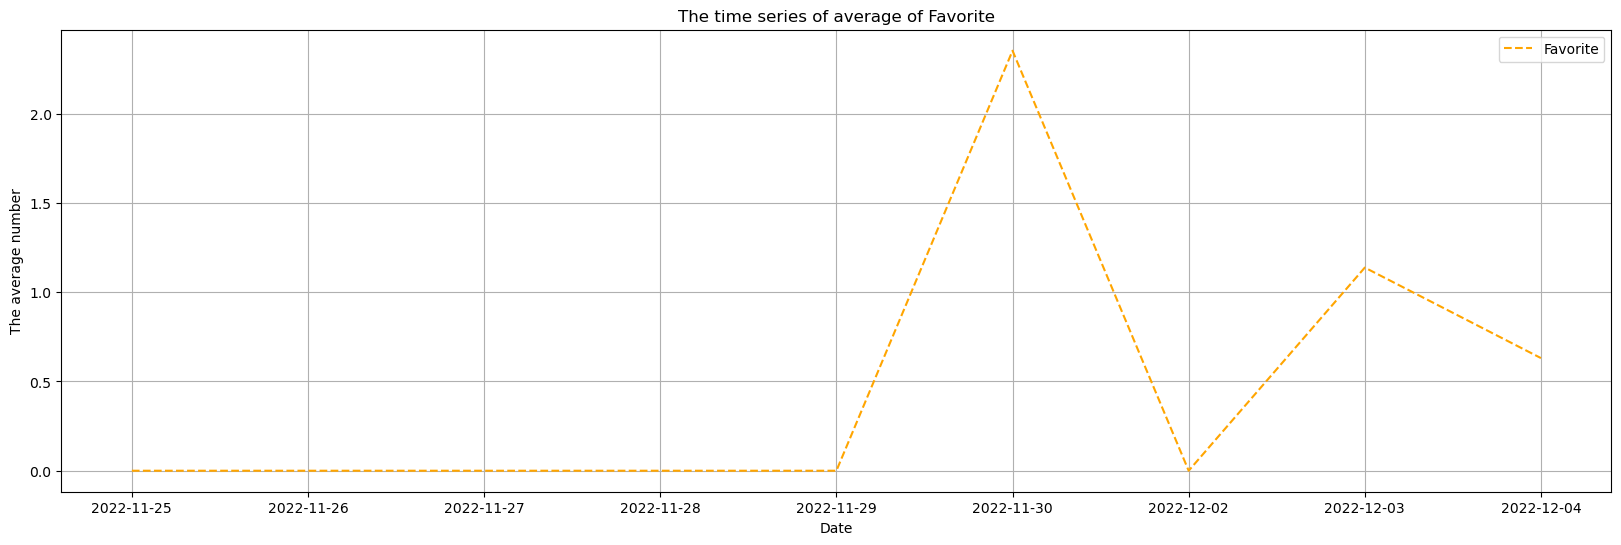

In [69]:
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.title('The time series of average of Favorite')
plt.xlabel('Date')
plt.ylabel('The average number')
plt.plot(time_series_group.favorite, 'orange', label='Favorite', linestyle='dashed')
plt.legend()

### Biểu đồ phân bố của Top 10 vị trí phổ biến của các Twitters

In [71]:
twitter_location = df1['location'].value_counts().reset_index()
twitter_location.columns = ['Location', 'No of twitter']
twitter_location_top10 = twitter_location.head(10)
twitter_location_top10 

,Location,No of twitter
0,Others,20464
1,Japan,1398
2,Metaverse,459
3,Usa,347
4,Nigeria,341
5,India,223
6,Lagos,193
7,Canada,185
8,Earth,159
9,Blockchain,106


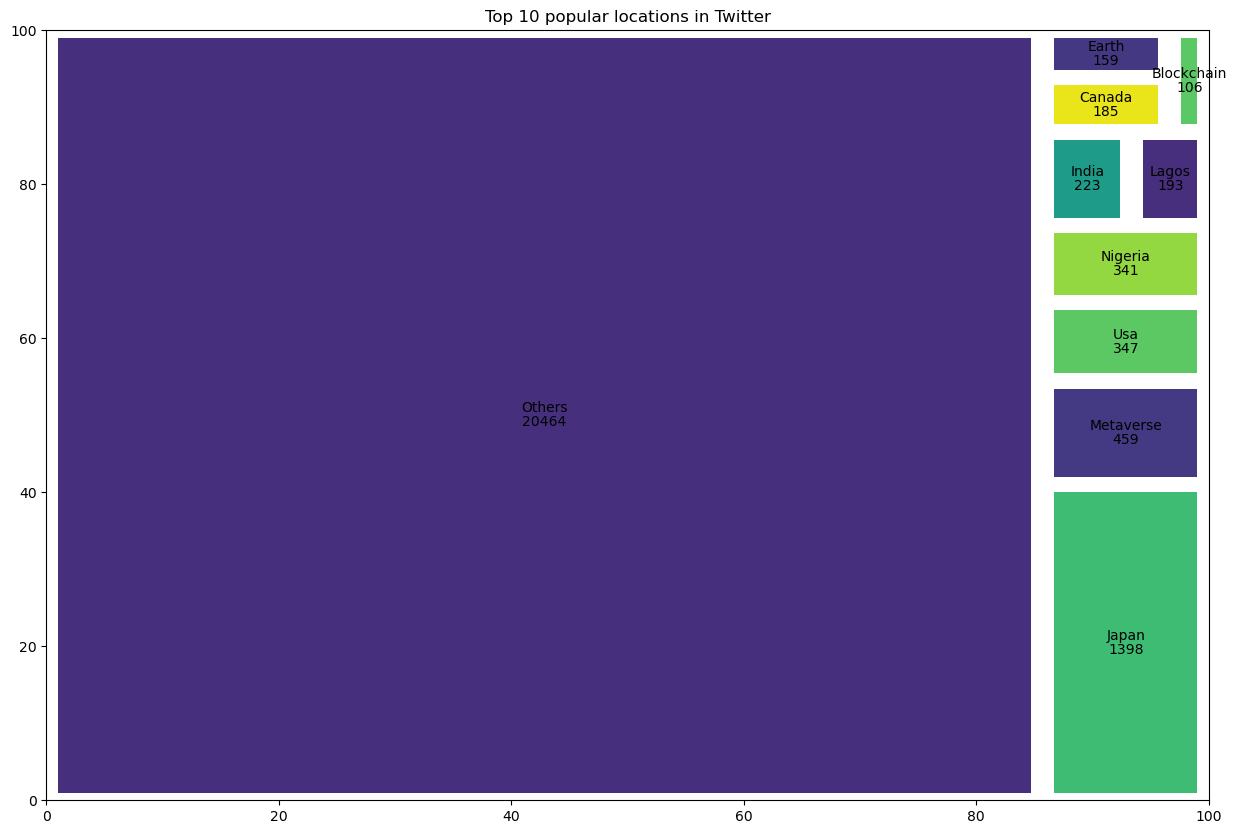

In [72]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Top 10 popular locations in Twitter')
squarify.plot(sizes=twitter_location_top10['No of twitter'],label=twitter_location_top10['Location'],ax=ax,pad=True,
             value=twitter_location_top10['No of twitter'])
plt.show()

## World Cloud về các text trong Twitter

In [73]:
text = " ".join(i for i in df1.text)

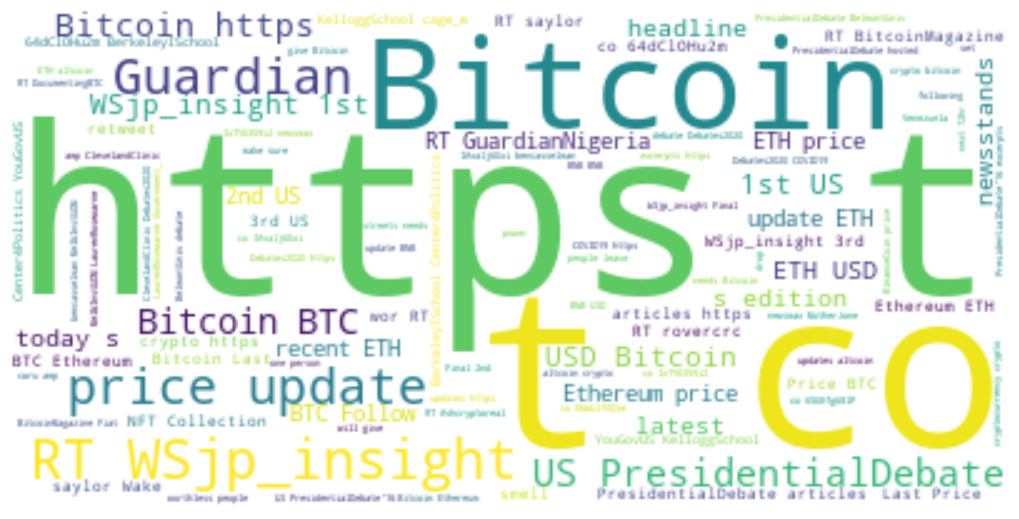

In [74]:
wc = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## Trực quan hóa dựa trên cảm xúc người dùng (Sentiment)

### Bitcoin from Twitter

In [77]:
from textblob import Word, TextBlob

In [78]:
df_bitcoin = df1[["clean_text"]]
df_bitcoin.head(5)

,clean_text
0,Bitcoin price update: $BNBBitcoin $291.12 USD...
1,Software tend to either get better or get wor...
2,"Average Bitcoin market price is: USD 16,965.2..."
3,Pro Bitcoin Trader: Massive Christmas Move Co...
4,Bitcoin Could Fall Under Selling Pressure At ...


In [79]:
df_bitcoin["Polarity"] = df_bitcoin['clean_text'].apply(lambda x: TextBlob(x).sentiment[0])
df_bitcoin["Subjectivity"] = df_bitcoin['clean_text'].apply(lambda x: TextBlob(x).sentiment[1])
df_bitcoin.head(5)

/tmp/ipykernel_15100/552019323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bitcoin["Polarity"] = df_bitcoin['clean_text'].apply(lambda x: TextBlob(x).sentiment[0])
/tmp/ipykernel_15100/552019323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bitcoin["Subjectivity"] = df_bitcoin['clean_text'].apply(lambda x: TextBlob(x).sentiment[1])


,clean_text,Polarity,Subjectivity
0,Bitcoin price update: $BNBBitcoin $291.12 USD...,0.000000,0.000000
1,Software tend to either get better or get wor...,0.033333,0.366667
2,"Average Bitcoin market price is: USD 16,965.2...",-0.150000,0.400000
3,Pro Bitcoin Trader: Massive Christmas Move Co...,0.175000,0.775000
4,Bitcoin Could Fall Under Selling Pressure At ...,0.000000,0.000000


In [80]:
def getSentiment(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

In [81]:
df_bitcoin["Sentiment"] = df_bitcoin["Polarity"] .apply(getSentiment)
df_bitcoin.head(5)

/tmp/ipykernel_15100/1960438234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bitcoin["Sentiment"] = df_bitcoin["Polarity"] .apply(getSentiment)


,clean_text,Polarity,Subjectivity,Sentiment
0,Bitcoin price update: $BNBBitcoin $291.12 USD...,0.000000,0.000000,Neutral
1,Software tend to either get better or get wor...,0.033333,0.366667,Positive
2,"Average Bitcoin market price is: USD 16,965.2...",-0.150000,0.400000,Negative
3,Pro Bitcoin Trader: Massive Christmas Move Co...,0.175000,0.775000,Positive
4,Bitcoin Could Fall Under Selling Pressure At ...,0.000000,0.000000,Neutral


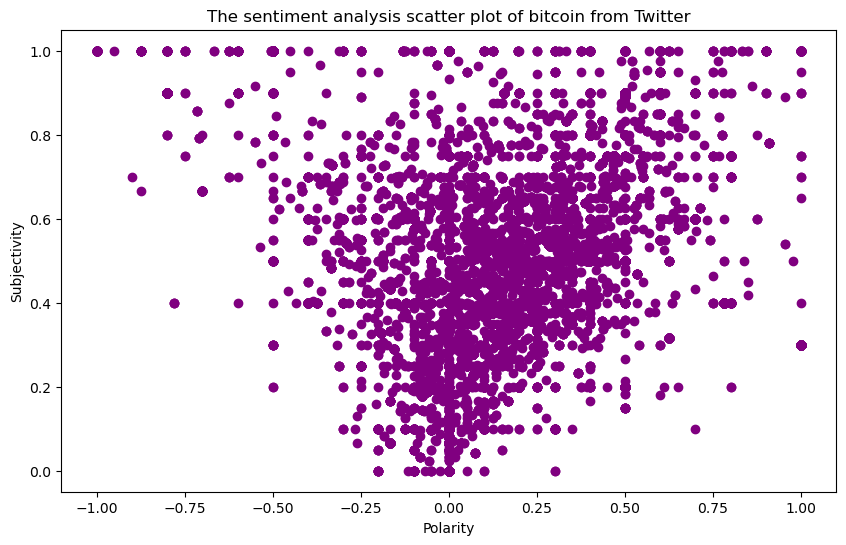

In [82]:
plt.figure(figsize=(10,6))
plt.scatter(df_bitcoin["Polarity"], df_bitcoin["Subjectivity"], color = "purple")
plt.title("The sentiment analysis scatter plot of bitcoin from Twitter")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [83]:
bitcoin_counts = df_bitcoin["Sentiment"].value_counts()
bitcoin_counts

Neutral     15738
Positive     9103
Negative     3161
Name: Sentiment, dtype: int64

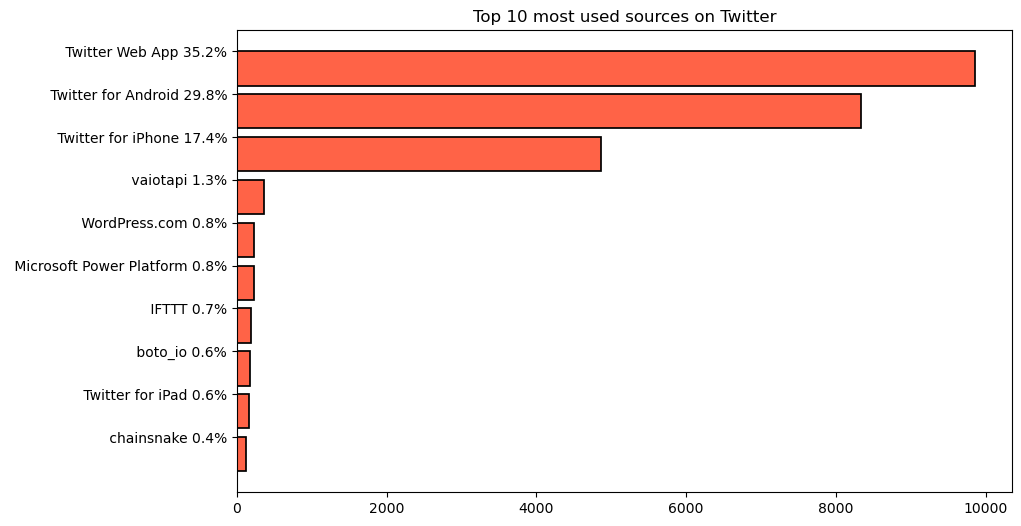

In [84]:
plt.figure(figsize=(10,6))
bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color='tomato', edgecolor = 'black',linewidth = 1.25)
y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(df1)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
plt.title("Top 10 most used sources on Twitter")
plt.show()

Text(0, 0.5, 'The number of Tweets')

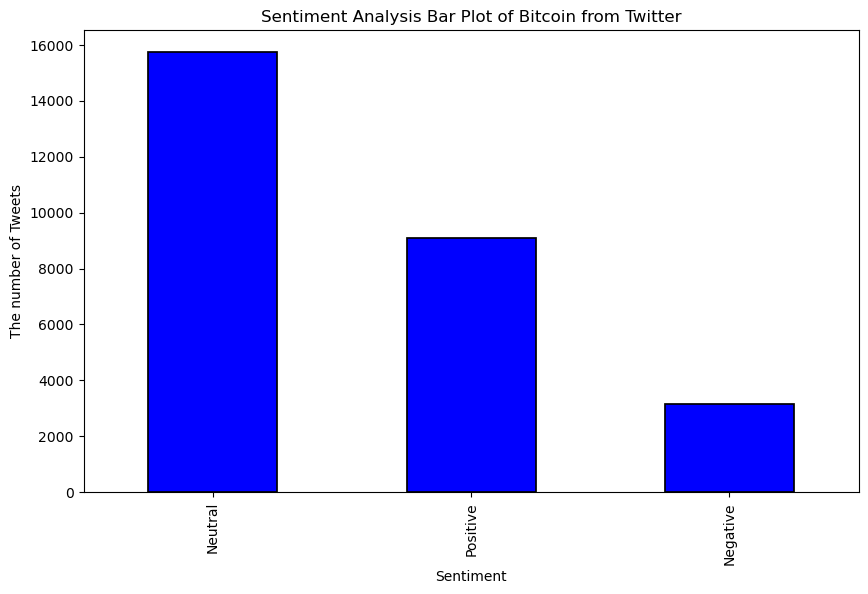

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = bitcoin_counts.plot.bar(color='blue', edgecolor = 'black',linewidth = 1.25)
ax.set_title("Sentiment Analysis Bar Plot of Bitcoin from Twitter")
ax.set_xlabel("Sentiment")
ax.set_ylabel("The number of Tweets")

### Presidential Debate from Twitter

In [86]:
import nltk
from nltk.corpus import stopwords

In [87]:
df_trump_biden = df1[["clean_text", "created_at"]]

In [88]:
trump_refs = ["DonaldTrump", "Donald Trump", "Donald", "Trump", 'Trump\'s']
biden_refs = ["JoeBiden", "Joe Biden", "Joe", "Biden", 'Biden\'s']

In [89]:
def identify_subject(tweet, refs):
  flag = 0
  for ref in refs:
    if tweet.find(ref) != -1:
      flag = 1
  return flag

df_trump_biden["Trump"] = df_trump_biden["clean_text"].apply(lambda x: identify_subject(x, trump_refs ))
df_trump_biden["Biden"] = df_trump_biden["clean_text"].apply(lambda x: identify_subject(x, biden_refs ))
df_trump_biden.head(5)

/tmp/ipykernel_15100/1116003224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trump_biden["Trump"] = df_trump_biden["clean_text"].apply(lambda x: identify_subject(x, trump_refs ))
/tmp/ipykernel_15100/1116003224.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trump_biden["Biden"] = df_trump_biden["clean_text"].apply(lambda x: identify_subject(x, biden_refs ))


,clean_text,created_at,Trump,Biden
0,Bitcoin price update: $BNBBitcoin $291.12 USD...,2022-12-03,0,0
1,Software tend to either get better or get wor...,2022-12-03,0,0
2,"Average Bitcoin market price is: USD 16,965.2...",2022-12-03,0,0
3,Pro Bitcoin Trader: Massive Christmas Move Co...,2022-12-04,0,0
4,Bitcoin Could Fall Under Selling Pressure At ...,2022-12-04,0,0


In [90]:
nltk.download('all')
stop_words = stopwords.words('english')
custom_stopwords = ["PresidentDebate"]

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/uyen/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /home/uyen/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/uyen/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/uyen/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/uyen/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/uyen/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zi

In [91]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df_trump_biden['processed_text'] = df_trump_biden['clean_text'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df_trump_biden = df_trump_biden.loc[(df_trump_biden['Trump']==1) | (df_trump_biden['Biden']==1)]
df_trump_biden.head(5)

/tmp/ipykernel_15100/2900568554.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trump_biden['processed_text'] = df_trump_biden['clean_text'].apply(lambda x: preprocess_tweets(x, custom_stopwords))


,clean_text,created_at,Trump,Biden,processed_text
35,@hanzo_btc: @BTC_Archive @JoeNakamoto Those w...,2022-12-03,0,1,@hanzo_btc: @BTC_Archive @JoeNakamoto Those th...
440,@hodgetwins: So Vi Jayjay censored the Hunter...,2022-12-04,0,1,@hodgetwins: So Vi Jayjay censored Hunter Bide...
490,@JoeNakamoto Ethereum is dogshit.I don't know...,2022-12-04,0,1,@JoeNakamoto Ethereum dogshit.I know count hal...
807,@JoelDalais: @elonmusk @TwitterSupport - plea...,2022-12-03,0,1,@JoelDalais: @elonmusk @TwitterSupport - pleas...
1265,@JoelDalais: @elonmusk @TwitterSupport - plea...,2022-12-03,0,1,@JoelDalais: @elonmusk @TwitterSupport - pleas...


In [92]:
df_trump_biden['polarity'] = df_trump_biden['processed_text'].apply(lambda x: TextBlob(x).sentiment[0])
df_trump_biden['subjectivity'] = df_trump_biden['processed_text'].apply(lambda x: TextBlob(x).sentiment[1])
df_trump_biden[['processed_text', 'created_at', 'Biden', 'Trump', 'polarity', 'subjectivity']].head(5)


,processed_text,created_at,Biden,Trump,polarity,subjectivity
35,@hanzo_btc: @BTC_Archive @JoeNakamoto Those th...,2022-12-03,1,0,0.2,0.200000
440,@hodgetwins: So Vi Jayjay censored Hunter Bide...,2022-12-04,1,0,-0.7,0.666667
490,@JoeNakamoto Ethereum dogshit.I know count hal...,2022-12-04,1,0,0.0,0.000000
807,@JoelDalais: @elonmusk @TwitterSupport - pleas...,2022-12-03,1,0,0.0,0.000000
1265,@JoelDalais: @elonmusk @TwitterSupport - pleas...,2022-12-03,1,0,0.0,0.000000


In [93]:
labels_biden = ["Trump", "Biden"]
labels_trump = ["Biden", "Trump"]
colors = ['gold', 'mediumturquoise']

In [94]:
biden_count = df_trump_biden["Biden"].value_counts().sort_index()
biden_count

0    14
1    72
Name: Biden, dtype: int64

In [95]:
trump_count = df_trump_biden["Trump"].value_counts().sort_index()
trump_count

0    71
1    15
Name: Trump, dtype: int64

In [96]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels_trump, values=trump_count, name="Trump"),
              1, 1)
fig.add_trace(go.Pie(labels=labels_biden, values=biden_count, name="Biden"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Distribution of Trump and Biden in Presidential Debate from Twitter",
    annotations=[dict(text='Trump', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Biden', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [97]:
biden = df_trump_biden[df_trump_biden['Biden']==1][['created_at', 'polarity']]
biden = biden.sort_values(by='created_at', ascending=True)
biden['MA Polarity'] = biden.polarity.rolling(10, min_periods=3).mean()

trump = df_trump_biden[df_trump_biden['Trump']==1][['created_at', 'polarity']]
trump = trump.sort_values(by='created_at', ascending=True)
trump['MA Polarity'] = trump.polarity.rolling(10, min_periods=3).mean()


In [98]:
biden.head(5)

,created_at,polarity,MA Polarity
35,2022-12-03,0.2000,NaN
14141,2022-12-03,0.3125,NaN
14806,2022-12-03,0.0000,0.170833
17372,2022-12-03,0.0000,0.128125
20693,2022-12-03,0.0000,0.102500


In [99]:
trump.head(5)

,created_at,polarity,MA Polarity
4025,2022-12-03,0.000000,NaN
8911,2022-12-03,-0.500000,NaN
13906,2022-12-03,0.100000,-0.133333
16941,2022-12-03,0.000000,-0.100000
36883,2022-12-03,0.033333,-0.073333


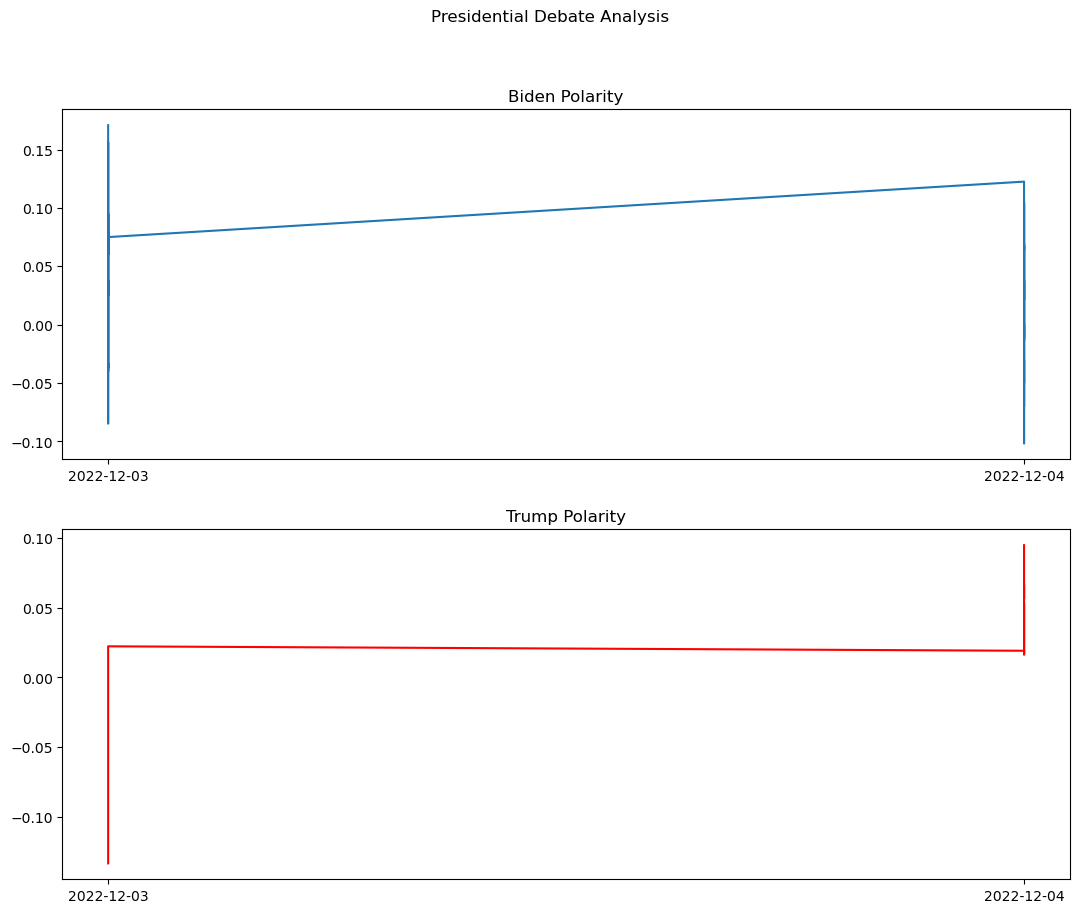

In [100]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(biden['created_at'], biden['MA Polarity'])
axes[0].set_title("\n".join(["Biden Polarity"]))
axes[1].plot(trump['created_at'], trump['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Trump Polarity"]))

fig.suptitle("\n".join(["Presidential Debate Analysis"]), y=0.98)

plt.show()

# Dự đoán

## Xử lý

In [101]:
df_forecast = df1[df1.location.str.contains(r'[Bitcoin]', na=False)]
df_forecast.head(5)

,uuid,screen_name,created_at,followers,location,favorite,retweet,source,text,statuses,tweet_hour,clean_text
0,257bd60a-733f-11ed-8e58-cdd0cb8dba8d,BNB_Tracker,2022-12-03,342,Others,2,0,Twitter Web App,#BinanceCoin price update: $BNB\n\n#BNB $291....,91973,14,Bitcoin price update: $BNBBitcoin $291.12 USD...
1,0948f928-733d-11ed-8e58-cdd0cb8dba8d,lopp,2022-12-03,423104,Cyberspace,57,14,Hypefury,Software tend to either get better or get wor...,38675,15,Software tend to either get better or get wor...
2,ca0f5a41-7338-11ed-8e58-cdd0cb8dba8d,bitcoinrate247,2022-12-03,433,International,0,0,BtcApp,"Average Bitcoin market price is: USD 16,965.2...",58224,16,"Average Bitcoin market price is: USD 16,965.2..."
3,b7b3fd6b-738e-11ed-8e58-cdd0cb8dba8d,mariama_kromah,2022-12-04,0,Others,0,0,Twitter Web App,Pro Bitcoin Trader: Massive Christmas Move Co...,8,3,Pro Bitcoin Trader: Massive Christmas Move Co...
5,136407db-733f-11ed-8e58-cdd0cb8dba8d,Respect7752,2022-12-03,144,Others,0,27,Twitter for Android,RT @mustafaavsr54: You still have a chance to...,2566,14,@mustafaavsr54: You still have a chance to in...


In [102]:
df_forecast = df_forecast["created_at"].value_counts().sort_index().to_frame('counts')
df_forecast

,counts
2022-11-25,376
2022-11-26,376
2022-11-27,188
2022-11-28,188
2022-11-29,376
2022-11-30,1279
2022-12-02,188
2022-12-03,12647
2022-12-04,11435


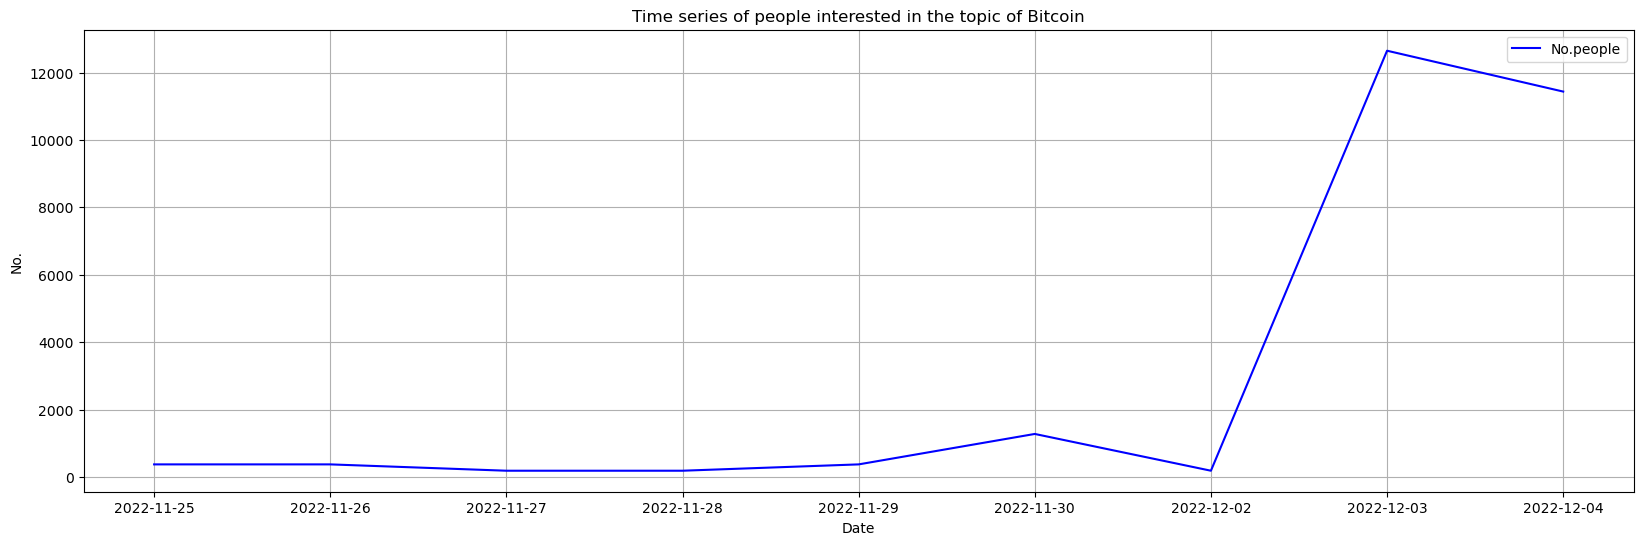

In [103]:
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.title('Time series of people interested in the topic of Bitcoin')
plt.xlabel('Date')
plt.ylabel('No.')
plt.plot(df_forecast.counts, 'blue', label='No.people')
plt.legend()

## Arima

In [104]:
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima

In [105]:
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    # .dropna() handles differenced data
    result = adfuller(series.dropna(), autolag='AIC')

    labels = ['ADF test statistic', 'p-value',
              'Number of lags used', 'Number of observations']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'critical value ({key})'] = val

    # .to_string() removes the line "dtype: float64"
    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non stationary")

In [106]:
adf_test(df_forecast.counts, 'Bitcoin Topic')

Augmented Dickey-Fuller Test: Bitcoin Topic
ADF test statistic        5.627494
p-value                   1.000000
Number of lags used       1.000000
Number of observations    7.000000
critical value (1%)      -4.938690
critical value (5%)      -3.477583
critical value (10%)     -2.843868
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [107]:
dff = df_forecast.copy()

In [108]:
dff['diff1'] = df_forecast.counts.diff()
dff.head()

,counts,diff1
2022-11-25,376,NaN
2022-11-26,376,0.0
2022-11-27,188,-188.0
2022-11-28,188,0.0
2022-11-29,376,188.0


<AxesSubplot:>

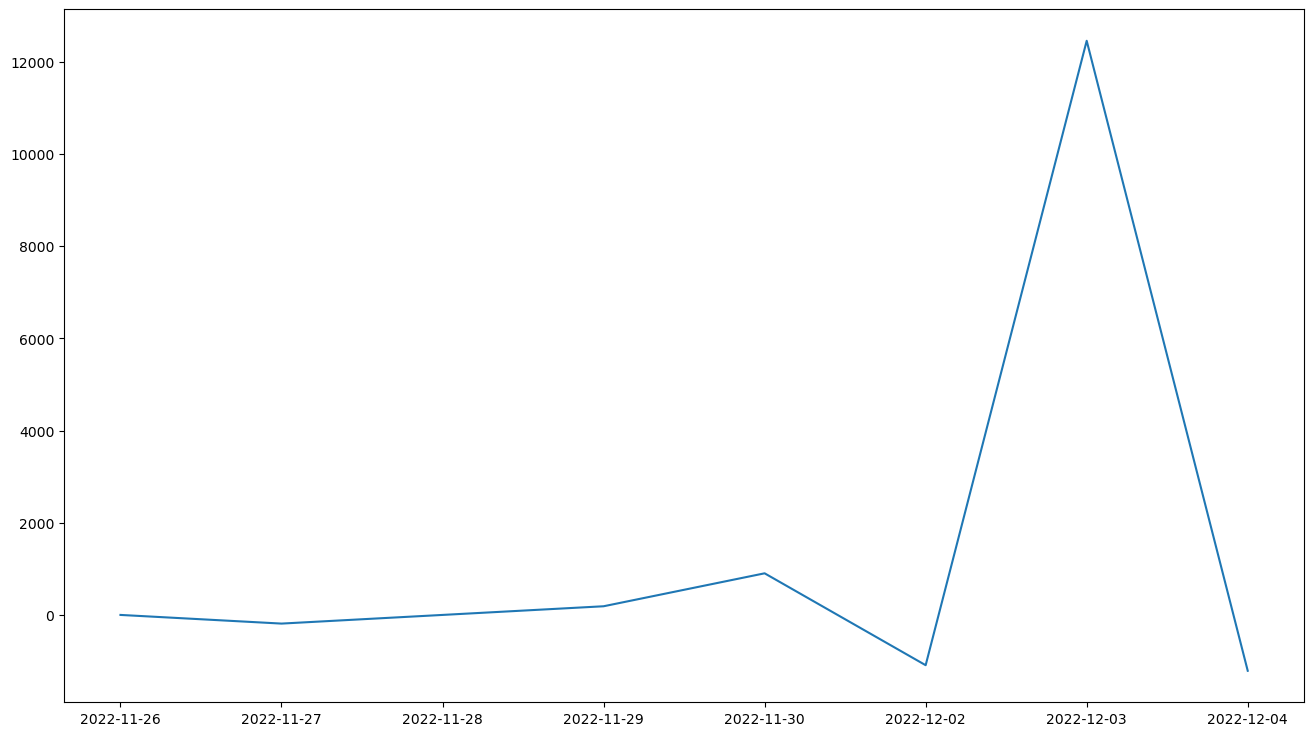

In [109]:
dff['diff1'].dropna().plot(figsize=(16, 9))

In [110]:
adf_test(dff['diff1'], 'Bitcoin Topic at First Difference')

Augmented Dickey-Fuller Test: Bitcoin Topic at First Difference
ADF test statistic        1.728868
p-value                   0.998197
Number of lags used       2.000000
Number of observations    5.000000
critical value (1%)      -6.045114
critical value (5%)      -3.929280
critical value (10%)     -2.986810
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [111]:
dff['diff2'] = dff['diff1'].diff()
dff.head()

,counts,diff1,diff2
2022-11-25,376,NaN,NaN
2022-11-26,376,0.0,NaN
2022-11-27,188,-188.0,-188.0
2022-11-28,188,0.0,188.0
2022-11-29,376,188.0,188.0


<AxesSubplot:>

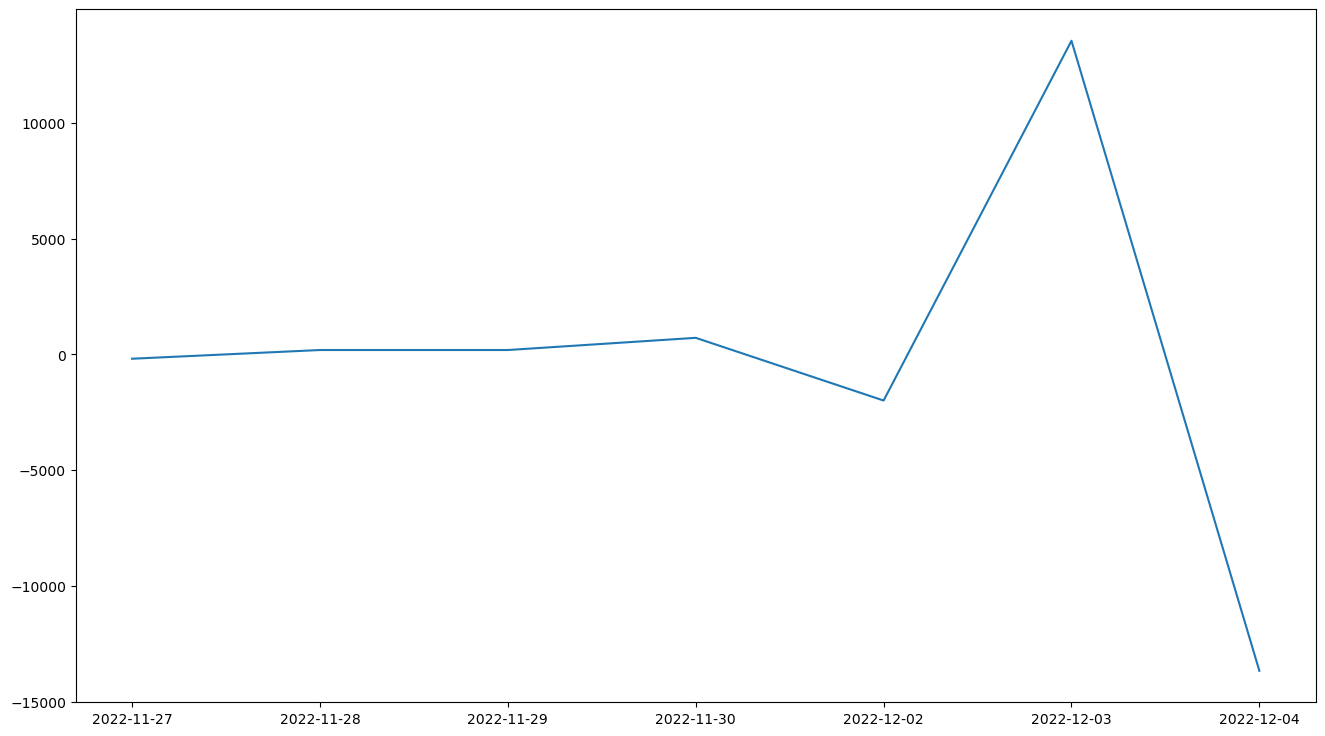

In [112]:
dff['diff2'].dropna().plot(figsize=(16, 9))

In [113]:
adf_test(dff['diff2'], 'Bitcoin Topic at First Difference')

Augmented Dickey-Fuller Test: Bitcoin Topic at First Difference
ADF test statistic       -5.881684e+00
p-value                   3.067828e-07
Number of lags used       0.000000e+00
Number of observations    6.000000e+00
critical value (1%)      -5.354256e+00
critical value (5%)      -3.646238e+00
critical value (10%)     -2.901198e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [114]:
def arima_model(ts_data):
    fit_model = auto_arima(ts_data, test='adf', seasonal=False, trace=True)
    print(fit_model.summary())
    return fit_model

In [115]:
fitted = arima_model(df_forecast)
fitted.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=143.864, Time=1.77 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=148.439, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=146.453, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=145.287, Time=1.49 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec


/home/uyen/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(2,2,2)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/home/uyen/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/home/uyen/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/home/uyen/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/home/uyen/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/home/uyen/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start

 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=143.319, Time=0.48 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=145.129, Time=0.42 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=143.896, Time=0.44 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=nan sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 9.865 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    9
Model:               SARIMAX(1, 2, 1)   Log Likelihood                 -68.659
Date:                Sun, 04 Dec 2022   AIC                            143.319
Time:                        23:15:13   BIC     

/home/uyen/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(2,2,2)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/home/uyen/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/home/uyen/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/home/uyen/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/home/uyen/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/home/uyen/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    9
Model:               SARIMAX(1, 2, 1)   Log Likelihood                 -68.659
Date:                Sun, 04 Dec 2022   AIC                            143.319
Time:                        23:15:13   BIC                            143.157
Sample:                             0   HQIC                           141.313
                                  - 9                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      3.501     -0.286      0.775      -7.862       5.862
ma.L1         -0.1096      5.253     -0.021      0.983     -10.406      10.187
sigma2      1.936e+07      3e-06   6.45e+12      0.000    1.94e+07    1.94e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 5.19
Prob(Q):                              0.49   Prob(JB):                         0.07
Heteroskedasticity (H):             431.32   Skew:                             1.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
pred_arima = fitted.predict(1)
pred_arima

/home/uyen/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



9    23770.04268
dtype: float64

## Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [118]:
df_lr = df_forecast.copy()
df_lr.head(5)

,counts
2022-11-25,376
2022-11-26,376
2022-11-27,188
2022-11-28,188
2022-11-29,376


In [119]:
test_lr = df_lr.reset_index()
test_lr['created_at'] = pd.to_datetime(test_lr['index']).apply(pd.DateOffset(1))
test_lr = test_lr.drop(['index', 'counts'], axis=1).set_index('created_at')
test_lr = test_lr.tail(1)
test_lr 

/home/uyen/anaconda3/lib/python3.9/site-packages/pandas/core/apply.py:1098: FutureWarning:

DateOffset.__call__ is deprecated and will be removed in a future version.  Use `offset + other` instead.



""
created_at
2022-12-05


In [120]:
df_lr['Timestamp'] = pd.to_datetime(df_lr.index).astype(np.int64)
df_lr.head(5)

/tmp/ipykernel_15100/2329404178.py:1: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



,counts,Timestamp
2022-11-25,376,1669334400000000000
2022-11-26,376,1669420800000000000
2022-11-27,188,1669507200000000000
2022-11-28,188,1669593600000000000
2022-11-29,376,1669680000000000000


In [121]:
test_lr['Timestamp'] = pd.to_datetime(test_lr.index).astype(np.int64)
test_lr

/tmp/ipykernel_15100/2861018287.py:1: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



,Timestamp
created_at,
2022-12-05,1670198400000000000


In [122]:
X_train = df_lr['Timestamp'].values.reshape(-1, 1)
y_train = df_lr['counts'].values.reshape(-1, 1)

In [123]:
X_test = test_lr['Timestamp'].values.reshape(-1, 1)

In [124]:
parameters = {'fit_intercept':[True,False],  'copy_X':[True, False]}
grid_lr = GridSearchCV(LinearRegression(),parameters, scoring='r2', cv=None).fit(X_train, y_train)

/home/uyen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/home/uyen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/home/uyen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/home/uyen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/home/uyen/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan]



In [125]:
pred_lr = grid_lr.predict(X_test)
pred_lr

array([[9904.5125]])

## Support Vector Machine

In [126]:
from sklearn.svm import SVR

In [127]:
parameters = {'kernel':['sigmoid', 'rbf'],  
              'C':np.arange(0.1, 0.2, 0.1),
              'gamma':np.arange(0.1, 5, 0.1)
              }
grid_svr = GridSearchCV(SVR(),parameters, scoring='r2', cv=None).fit(X_train, y_train)

/home/uyen/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/uyen/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/uyen/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/uyen/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/uyen/anaconda3/lib/python3.9/site-

In [128]:
pred_svr = grid_svr.predict(X_test)
pred_svr

array([376.])